In [613]:
import random 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [614]:
import pandas as pd
h=pd.read_csv("E:\colab\loan_train.csv")
df = pd.DataFrame(h)

In [615]:
df.head()
df=df[["loan_status","Principal","terms","age","education","Gender"]]


In [616]:
df['loan_status']=df["loan_status"].replace("PAIDOFF",1)
df['loan_status']=df["loan_status"].replace("COLLECTION",0)
df['Gender']=df["Gender"].replace("male",1)
df['Gender']=df["Gender"].replace("female",0)
df['education']=df["education"].replace("college",1)
df['education']=df["education"].replace("Bechalor",2)
df['education']=df["education"].replace("High School or Below",0)
df['education']=df["education"].replace("Master or Above",3)


In [617]:
X=df[["Principal","terms","age","education","Gender"]]
y=df["loan_status"]


In [618]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y)

In [619]:
p=LogisticRegression()
vcb=DecisionTreeClassifier()
clf = svm.SVC(kernel='linear')
model = KNeighborsClassifier(n_neighbors=7)

In [620]:
p.fit(X_train,y_train)
vcb.fit(X_train,y_train)
clf.fit(X_train,y_train)
model.fit(X_train,y_train)

C:\Users\Mayank\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier(n_neighbors=7)

In [621]:
z=p.predict(X_test)
mfv=vcb.predict(X_test)
mnb=clf.predict(X_test)
xmn=model.predict(X_test)

In [622]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, z),accuracy_score(y_test, mfv),accuracy_score(y_test, mnb),accuracy_score(y_test, xmn))

0.7586206896551724 0.6206896551724138 0.7586206896551724 0.7471264367816092


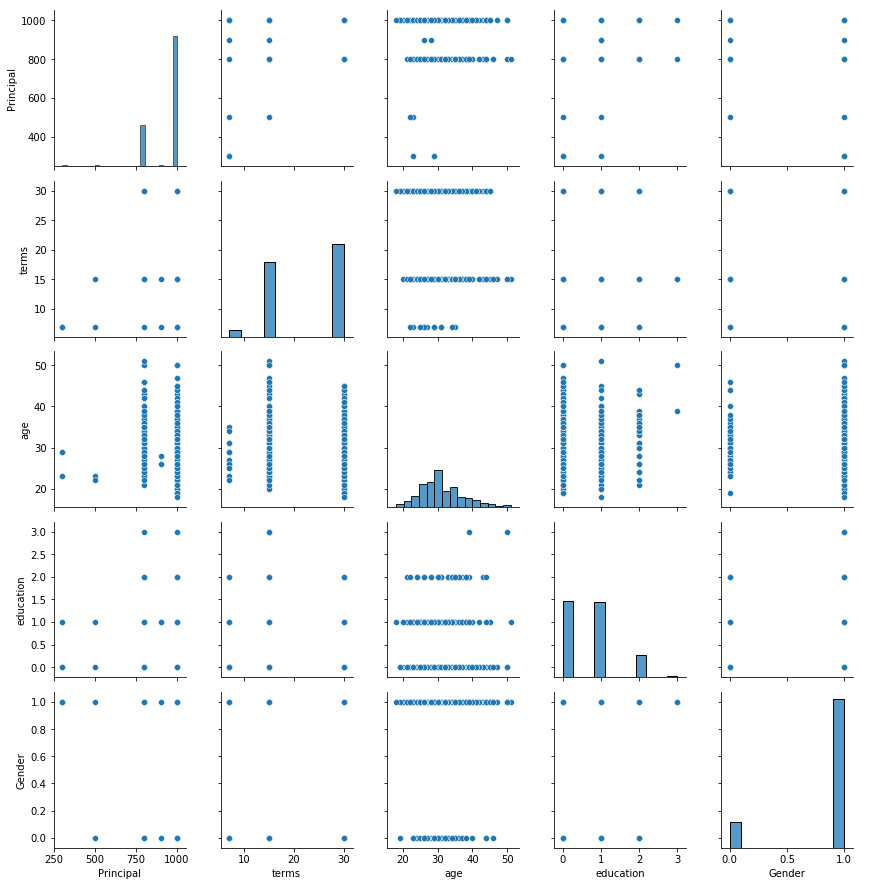

In [592]:
sns.pairplot(X)

In [623]:
xvc=pd.read_csv("E:\colab\loan_test.csv")
mo=pd.DataFrame(xvc)

In [624]:

mo=mo[["loan_status","Principal","terms","age","education","Gender"]]

In [625]:
mo['loan_status']=mo["loan_status"].replace("PAIDOFF",1)
mo['loan_status']=mo["loan_status"].replace("COLLECTION",0)
mo['Gender']=mo["Gender"].replace("male",1)
mo['Gender']=mo["Gender"].replace("female",0)
mo['education']=mo["education"].replace("college",1)
mo['education']=mo["education"].replace("Bechalor",2)
mo['education']=mo["education"].replace("High School or Below",0)
mo['education']=mo["education"].replace("Master or Above",3)

In [626]:
r=mo[["Principal","terms","age","education","Gender"]]
r1=mo["loan_status"]

In [627]:
kcv=p.predict(r)
fs=vcb.predict(r)
vck=clf.predict(r)
bhy=model.predict(r)

In [628]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


In [629]:
print(jaccard_score(r1, kcv),f1_score(r1, kcv, average='macro'),log_loss(r1, kcv),": logistic regration")
print(jaccard_score(r1, fs),f1_score(r1, fs, average='macro'),log_loss(r1, fs),":decision tree")
print(jaccard_score(r1, vck),f1_score(r1, vck, average='macro'),log_loss(r1, vck),":svm")
print(jaccard_score(r1, bhy),f1_score(r1, bhy, average='macro'),log_loss(r1, bhy),":knn")

0.7407407407407407 0.425531914893617 8.95470488690319 : logistic regration
0.6078431372549019 0.4934333958724203 12.792302286480483 :decision tree
0.7407407407407407 0.425531914893617 8.95470488690319 :svm
0.7222222222222222 0.41935483870967744 9.594311857179314 :knn
